In [11]:
import math
import matplotlib.pyplot as plt

%matplotlib inline

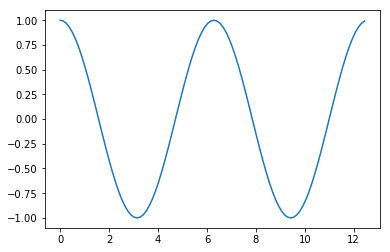

In [12]:
n = 50
x_k = []
y_k = []
for k in range(2*n):
    x = 2 * math.pi * k / n
    y = math.cos(x)
    x_k.append(x)
    y_k.append(y)

plt.plot(x_k, y_k)

In [13]:
def ecriture_fichier(nom_fichier, *args):
    num_fichier = open(nom_fichier, 'w')
    for x, y in zip(*args):
        line = '{} {}'.format(x, y)
        num_fichier.write('{} {}\n'.format(x, y))
    num_fichier.close()
ecriture_fichier('exo1.csv')

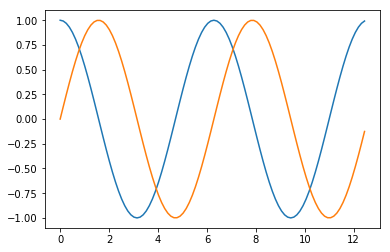

In [14]:
def lecture_fichier(nom_fichier):
    with open(nom_fichier) as num_fichier:
        x_k = []
        y_k = []
        for line in num_fichier:
            x, y = line.split()
            x_k.append(float(x))
            y_k.append(float(y))

    return x_k, y_k
    
x_k, y_k = lecture_fichier('exo1.csv')
z_k = []
for x in x_k:
    z_k.append(math.sin(x))
plt.plot(x_k, y_k)
plt.plot(x_k, z_k)

In [5]:
import numpy as np

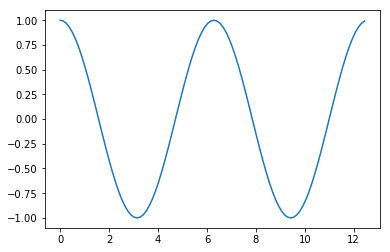

In [19]:
n = 50
k = np.arange(2*n)
x_k = 2 * np.pi * k / n
y_k = np.cos(x_k)

plt.plot(x_k, y_k)

In [46]:
def ecriture_fichier(nom_fichier):
    num_fichier = open(nom_fichier, 'w')
    for k in range(2*n):
        x = x_k[k]
        y = y_k[k]
        line = '{} {}'.format(x, y)
        num_fichier.write('{} {}\n'.format(x, y))
    num_fichier.close()
ecriture_fichier('exo1.csv')

#def lecture_fichier(nom_fichier):


In [34]:
def ecriture_fichier(nom_fichier, *elements):
    """Ecrit 
    """
    with open(nom_fichier, 'w') as file:
        for line in zip(elements):
            file.write(line)
            
            
    
ecriture_fichier('test.txt', x_k, y_k)

TypeError: write() argument must be str, not tuple